## PHASE-1 Data Visualization

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud
from collections import Counter
warnings.filterwarnings("ignore")

In [31]:
df_train = pd.read_csv('../data/preprocessed-essay.csv')

In [32]:
def string_to_list(string):
    return string.split()

In [33]:
def nan_to_blank(val):
    if pd.isna(val) or val is None:
        return ''
    else:
        return val

In [34]:
df_train['lemmatized_text'] = df_train['lemmatized_text'].apply(string_to_list)
df_train['cleaned_tokenize_text'] = df_train['cleaned_tokenize_text'].apply(string_to_list)
df_train['corrected_text'] = df_train['corrected_text'].apply(string_to_list)
df_train['mistakes'] = df_train['mistakes'].apply(nan_to_blank)
df_train['mistakes'] = df_train['mistakes'].apply(string_to_list)

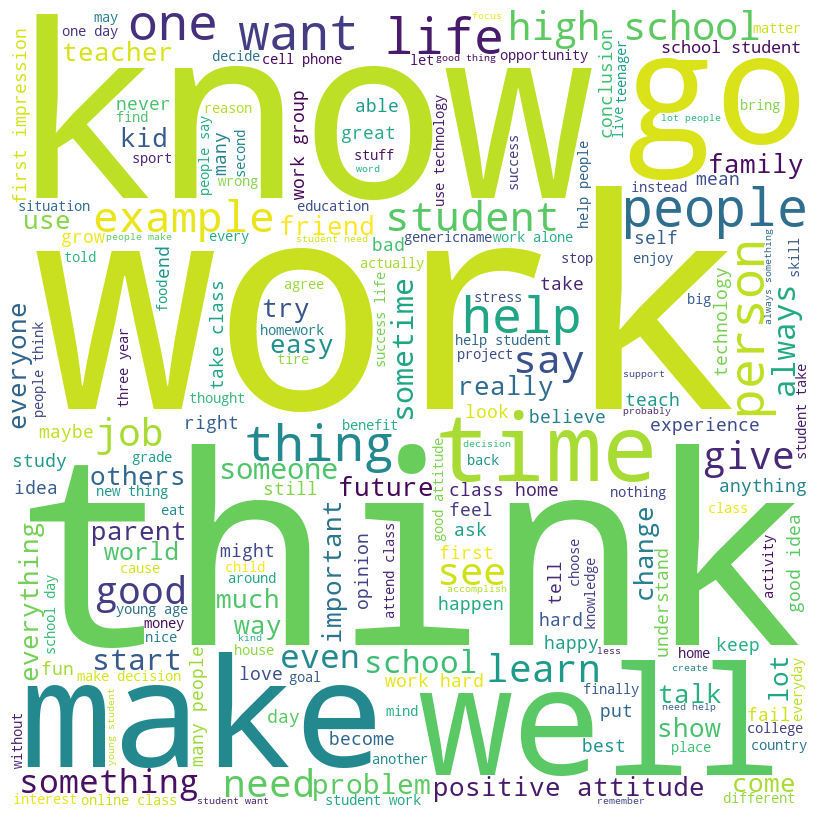

In [35]:
# Convert the list of tokenized words to a string for each row in the column
text = df_train['lemmatized_text'].apply(lambda x: ' '.join(x))

# Join the strings
words = ' '.join(text.tolist())

# Create a wordcloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(words)

sns.set_style('darkgrid')

# Plot the wordcloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

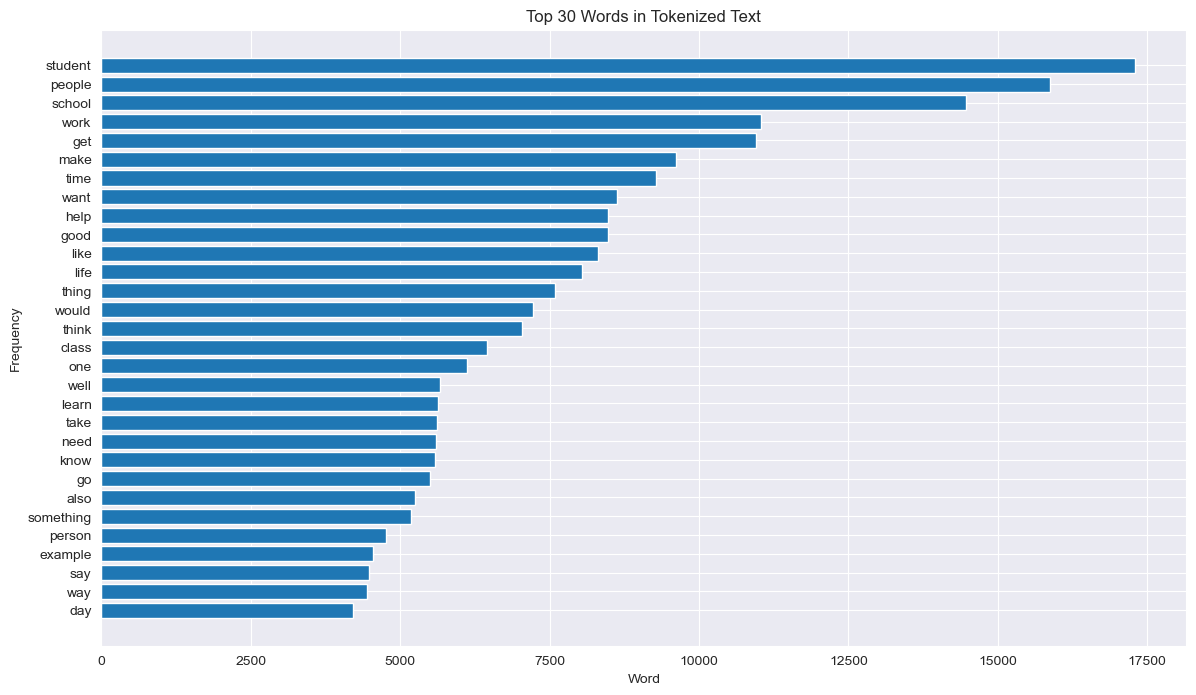

In [36]:
# Flatten the list of tokenized words
words = [word for sentence in df_train['lemmatized_text'] for word in sentence]

# Count the frequency of each word
word_freq = Counter(words)

# Print the 30 most common words and their frequencies
word_list = word_freq.most_common(30)

# Sort the word list in descending order of frequency
word_list = sorted(word_list, key=lambda x: x[1], reverse=False)

# Set the figure size
plt.figure(figsize=(14, 8))
sns.set_style('darkgrid')

# Create a bar chart of the word frequencies
plt.barh([word[0] for word in word_list], [word[1] for word in word_list])

# Set the chart title and axis labels
plt.title('Top 30 Words in Tokenized Text')
plt.xlabel('Word')
plt.ylabel('Frequency')

# Show the chart
plt.show()

mean essay length: 2335
min essay length: 82
max essay length: 6044


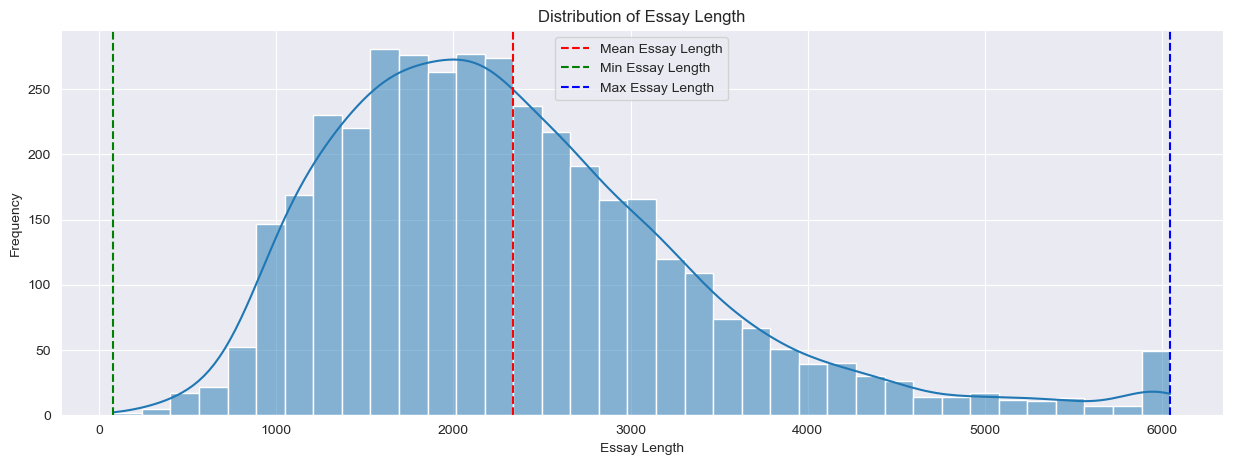

In [37]:
# Compute the length of each essay
essay_lengths = df_train['full_text'].apply(len)

# Compute the statistics
mean_length = essay_lengths.mean()
print('mean essay length:', round(mean_length))

min_length = essay_lengths.min()
print('min essay length:', round(min_length))

max_length = essay_lengths.max()
print('max essay length:', round(max_length))

# Set the figure size and style
plt.figure(figsize=(15, 5))
sns.set_style('darkgrid')

# Plot the distribution of essay lengths
sns.histplot(data=essay_lengths, kde=True)

# Add a vertical line for the mean essay length
plt.axvline(x=mean_length, color='red', linestyle='--', label='Mean Essay Length')

# Add a vertical line for the minimum essay length
plt.axvline(x=min_length, color='green', linestyle='--', label='Min Essay Length')

# Add a vertical line for the minimum essay length
plt.axvline(x=max_length, color='blue', linestyle='--', label='Max Essay Length')

# Set the title and labels
plt.title("Distribution of Essay Length")
plt.xlabel("Essay Length")
plt.ylabel("Frequency")

# Add a legend
plt.legend()

# Show the plot
plt.show()

Average Number of Sentences in an Essay: 18
Min Number of Sentences in an Essay: 1
Max Number of Sentences in an Essay: 99


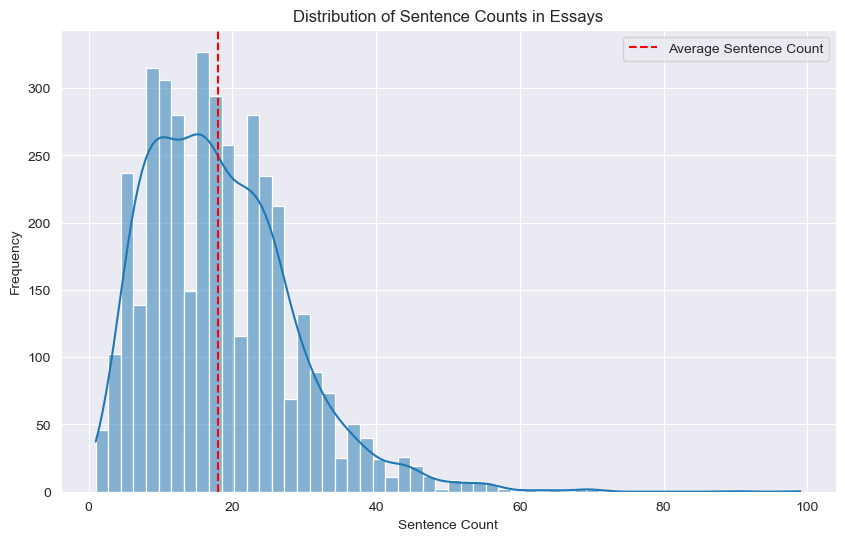

In [38]:
avg_sent = round(df_train['sent_count'].mean())
print('Average Number of Sentences in an Essay: {}'.format(avg_sent))

min_sent = round(df_train['sent_count'].min())
print('Min Number of Sentences in an Essay: {}'.format(min_sent))

max_sent = round(df_train['sent_count'].max())
print('Max Number of Sentences in an Essay: {}'.format(max_sent))

# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')

# Plot the distribution of sentence counts
title = 'Distribution of Sentence Counts in Essays'
sns.histplot(df_train['sent_count'], kde=True)
plt.axvline(x=avg_sent, color='red', linestyle='--', label='Average Sentence Count')
plt.legend()
plt.title(title)
plt.xlabel('Sentence Count')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Average Sentence Length: 30
Min Sentence Length: 6
Max Sentence Length: 578


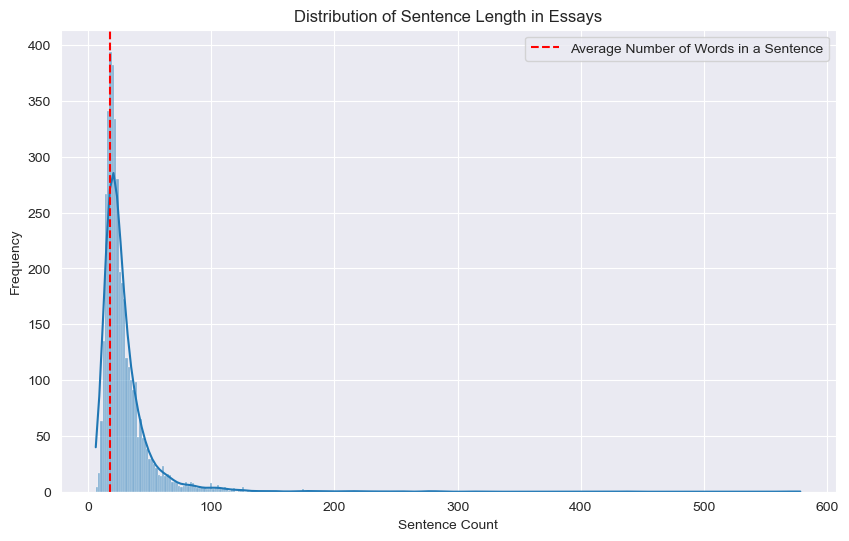

In [39]:
avg_sent_len = round(np.mean(df_train['sent_len']))
print('Average Sentence Length: {}'.format(avg_sent_len))

min_sent_len = round(np.min(df_train['sent_len']))
print('Min Sentence Length: {}'.format(min_sent_len))

max_sent_len = round(np.max(df_train['sent_len']))
print('Max Sentence Length: {}'.format(max_sent_len))

# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')

# Plot the distribution of sentence length
title = 'Distribution of Sentence Length in Essays'
sns.histplot(df_train['sent_len'], kde=True)
plt.axvline(x=avg_sent, color='red', linestyle='--', label='Average Number of Words in a Sentence')
plt.legend()
plt.title(title)
plt.xlabel('Sentence Count')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Mean word count in essay: 430
Min word count in essay: 14
Max word count in essay: 1260


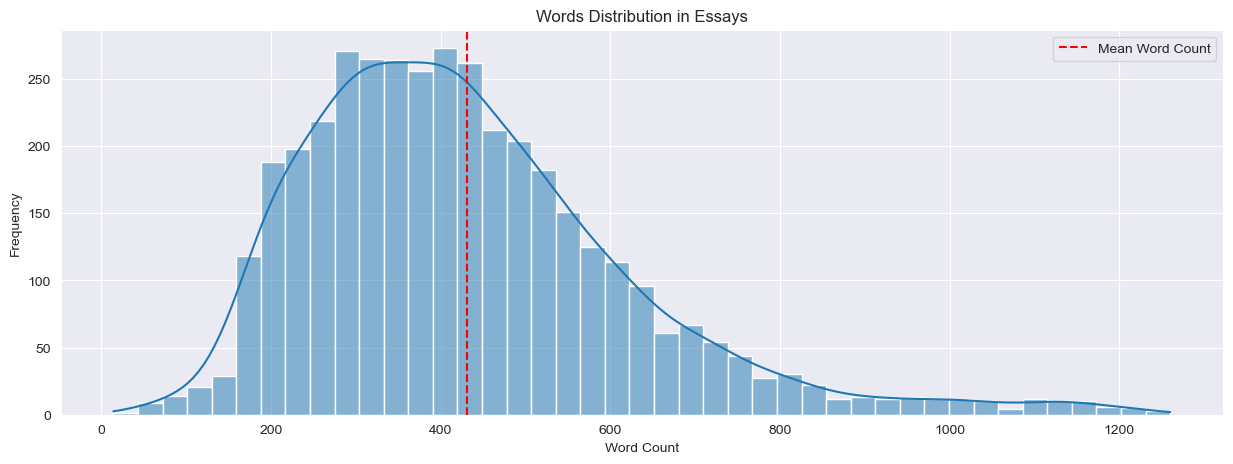

In [40]:
# Set the figure size and style
fig = plt.figure(figsize=(15, 5))
sns.set_style('darkgrid')

# Plot the distribution of word count
sns.histplot(data=df_train, x="word_count", kde=True)

# Plot the mean of word count
mean_word_count = df_train['word_count'].mean()
print('Mean word count in essay:', round(mean_word_count))

min_word_count = df_train['word_count'].min()
print('Min word count in essay:', round(min_word_count))

max_word_count = df_train['word_count'].max()
print('Max word count in essay:', round(max_word_count))

plt.axvline(x=mean_word_count, color='red', linestyle='--', label='Mean Word Count')
plt.legend()

# Set the title and labels
plt.title("Words Distribution in Essays")
plt.xlabel("Word Count")
plt.ylabel("Frequency")

# Show the plot
plt.show()
